## Tier 1. Module 3: Basic Algorithms and Data Structures

## Final Project

___
### Task 1. Data structures. Sorting. Work with a singly linked list

To implement a singly linked list (an example of implementation can be taken from the synopsis), it is necessary:
* write a function that implements the reversal of a singly linked list by changing the links between nodes;
* develop a sorting algorithm for a singly linked list, for example, sorting by insertions or merging;
* write a function that combines two sorted singly linked lists into one sorted list.

#### 1.1 - Singly linked list implementation

In [57]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self):
        self.head = None

    def insert_at_beginning(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node

    def insert_at_end(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            cur = self.head
            while cur.next:
                cur = cur.next
            cur.next = new_node

    def insert_after(self, prev_node: Node, data):
        if prev_node is None:
            print("The previous node does not exist.")
            return
        new_node = Node(data)
        new_node.next = prev_node.next
        prev_node.next = new_node

    def delete_node(self, key: int):
        cur = self.head
        if cur and cur.data == key:
            self.head = cur.next
            cur = None
            return
        prev = None
        while cur and cur.data != key:
            prev = cur
            cur = cur.next
        if cur is None:
            return
        prev.next = cur.next
        cur = None

    def search_element(self, data: int) -> Node | None:
        cur = self.head
        while cur:
            if cur.data == data:
                return cur
            cur = cur.next
        return None

    def print_list(self):
        current = self.head
        while current:
            print(current.data)
            current = current.next

    def reverse_list(self):
        if self.head:
            prev_node = None
            current = self.head
            while current.next:
                next_node = current.next
                current.next = prev_node
                prev_node = current
                current = next_node
            self.head = current
            current.next = prev_node

    def sort(self, ascending: bool = True) -> None:

        def merge_sort(head: Node, ascending: bool) -> Node:
            if not head or not head.next:
                return head

            middle = get_middle(head)
            next_to_middle = middle.next
            middle.next = None

            left_half = merge_sort(head, ascending)
            right_half = merge_sort(next_to_middle, ascending)

            return merge(left_half, right_half, ascending)

        def get_middle(head: Node) -> Node:
            if not head:
                return head

            slow = head
            fast = head

            while fast.next and fast.next.next:
                slow = slow.next
                fast = fast.next.next

            return slow

        def merge(left: Node, right: Node, ascending: bool) -> Node:
            dummy = Node()
            current = dummy

            while left and right:
                if ascending:
                    if left.data < right.data:
                        current.next = left
                        left = left.next
                    else:
                        current.next = right
                        right = right.next
                else:
                    if left.data > right.data:
                        current.next = left
                        left = left.next
                    else:
                        current.next = right
                        right = right.next
                current = current.next

            if left:
                current.next = left
            if right:
                current.next = right

            return dummy.next
        
        self.head = merge_sort(self.head, ascending)

    def merge_with_sorted(self, other_list) -> None:
        merged_list = LinkedList()
        current1 = self.head
        current2 = other_list.head

        while current1 and current2:
            if current1.data < current2.data:
                merged_list.insert_at_end(current1.data)
                current1 = current1.next
            else:
                merged_list.insert_at_end(current2.data)
                current2 = current2.next

        while current1:
            merged_list.insert_at_end(current1.data)
            current1 = current1.next

        while current2:
            merged_list.insert_at_end(current2.data)
            current2 = current2.next

        self.head = merged_list.head

#### 1.2 - Create two singly linked lists

In [58]:
llist_1 = LinkedList()

llist_1.insert_at_beginning(5)
llist_1.insert_at_beginning(10)
llist_1.insert_at_beginning(15)
llist_1.insert_at_end(20)
llist_1.insert_at_end(25)

print("Linked list 1:")
llist_1.print_list()

print()

llist_2 = LinkedList()

llist_2.insert_at_beginning(8)
llist_2.insert_at_beginning(4)
llist_2.insert_at_beginning(2)
llist_2.insert_at_end(16)
llist_2.insert_at_end(32)

print("Linked list 2:")
llist_2.print_list()

Linked list 1:
15
10
5
20
25

Linked list 2:
2
4
8
16
32


#### 1.3 - Reverse

In [59]:
llist_1.reverse_list()

print("Reversed linked list 1:")
llist_1.print_list()

Reversed linked list 1:
25
20
5
10
15


#### 1.4 - Sort

In [60]:
llist_1.sort()

print("Sorted linked list 1:")
llist_1.print_list()

Sorted linked list 1:
5
10
15
20
25


#### 1.5 - Merge two sorted sigly linked lists

In [61]:
llist_1.merge_with_sorted(llist_2)

print("List 1 merged with list 2:")
llist_1.print_list()

List 1 merged with list 2:
2
4
5
8
10
15
16
20
25
32


___
### Task 2. Recursion. Creation of the "Pythagoras tree" fractal using recursion

Write a Python program that uses recursion to create a Pythagorean tree fractal. The program should visualize the Pythagorean tree fractal, and the user should be able to specify the level of recursion.

In [2]:
from turtle import Screen, Turtle


def pythagorean_tree(t: Turtle, length: int, angle: int, level: int) -> None:
    """
    Function that recursivly draws Pythagorean tree fractal

    :param t: Turtle object (pen) that draws the fractal
    :param length: the length of the first line of the fractal,
    each subsequent recursive line will be 0.707 of the previous one
    :param angle: angle of the fractal branches
    :param level: level of recursion
    :return: None
    """
    if level == 0:
        return
    t.forward(length)  # draw a line
    t.left(angle)  # rotate the pen to start the next level of recursion
    pythagorean_tree(t, length * 0.707, angle, level - 1)
    t.right(
        2 * angle
    )  # rotate the pen to the opposite angle to start the next level of recursion
    pythagorean_tree(t, length * 0.707, angle, level - 1)
    t.left(angle)  # turn the pen in the original direction
    t.backward(length)  # return the pen to the original position


def main():
    """
    Function for configuring the Pythagorean tree fractal.
    The function takes the recursion level as input from the user
    and runs the pythagorean_tree() function, which draws the fractal.
    """
    level = int(input("Enter the level of recursion: "))
    angle = 45  # angle of branches

    screen = Screen()  # output screen setting
    screen.setup(width=800, height=600)
    screen.bgcolor("white")
    screen.title(f"Pythagorean Tree Fractal (Level of Recursion {level})")

    t = Turtle()
    t.speed(10)  # how fast fractal is drawn
    t.color("red")
    t.penup()  #  lift the pen off the drawing surface before moving the pen to the starting position to draw the fractal
    t.goto(0, -200)  # starting position of the pen
    t.pendown()  # lower the pen back onto the drawing surface
    t.left(
        90
    )  # the pen will draw lines counterclockwise and the first line will be vertical (90 degrees)

    pythagorean_tree(t, 150, angle, level)

    t.hideturtle()  # hides the pen after the fractal is drawn
    screen.mainloop()


# testing
main()

Output

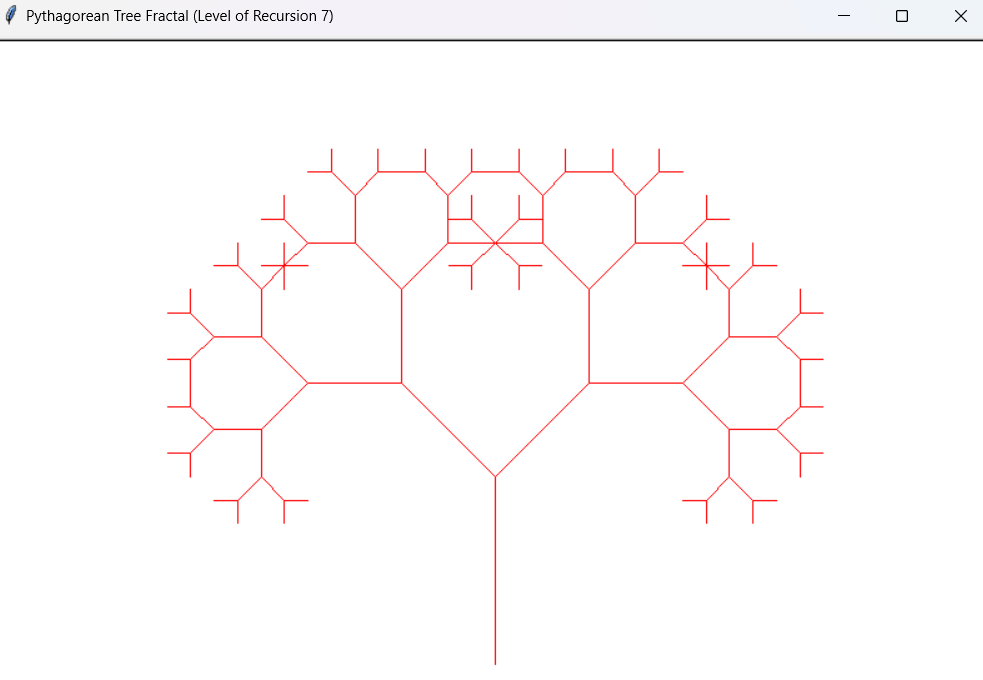

___
### Task 3. Trees, Dijkstra's algorithm

Develop Dijkstra's algorithm for finding shortest paths in a weighted graph using a binary heap. The task involves creating a graph, using a pyramid to optimize the selection of vertices, and computing the shortest paths from the initial vertex to all others.

Shortest paths from A:
To B: ['A', 'B'] with distance 5
To C: ['A', 'B', 'C'] with distance 8
To D: ['A', 'B', 'D'] with distance 8
To E: ['A', 'B', 'C', 'E'] with distance 12
To F: ['A', 'B', 'C', 'E', 'F'] with distance 13


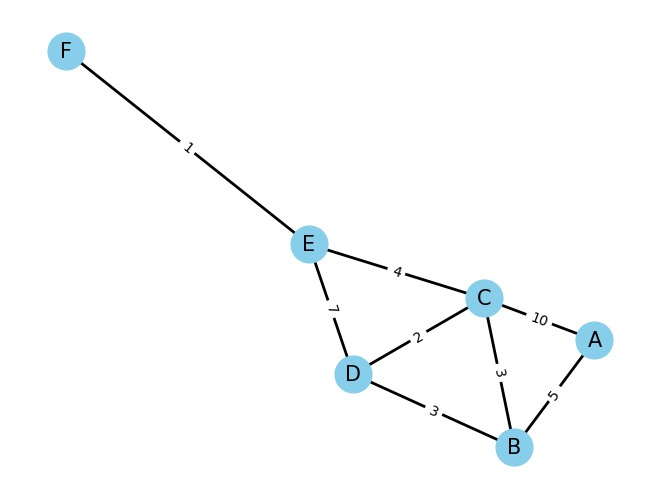

In [95]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx


def dijkstra(graph: nx.Graph, source: str) -> tuple[int, str]:
    distance = {node: float("inf") for node in graph.nodes()}
    previous = {node: None for node in graph.nodes()}
    distance[source] = 0
    priority_queue = [(0, source)]  # Binary heap

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distance[current_node]:
            continue

        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]["weight"]
            distance_through_current = current_distance + edge_weight

            if distance_through_current < distance[neighbor]:
                distance[neighbor] = distance_through_current
                previous[neighbor] = current_node
                heapq.heappush(priority_queue, (distance_through_current, neighbor))

    return distance, previous


def construct_shortest_path(previous: str, target: str) -> int:
    path = []
    current = target

    while current:
        path.append(current)
        current = previous[current]

    return path[::-1]


# Testing
graph = nx.Graph()
graph.add_weighted_edges_from(
    [
        ("A", "B", 5),
        ("A", "C", 10),
        ("B", "C", 3),
        ("B", "D", 3),
        ("C", "D", 2),
        ("C", "E", 4),
        ("D", "E", 7),
        ("E", "F", 1),
    ]
)

source_node = "A"
distances, previous_nodes = dijkstra(graph, source_node)

print(f"Shortest paths from {source_node}:")
for node in graph.nodes():
    if node != source_node:
        shortest_path = construct_shortest_path(previous_nodes, node)
        print(f"To {node}: {shortest_path} with distance {distances[node]}")

pos = nx.spring_layout(graph, seed=42)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=700,
    node_color="skyblue",
    font_size=15,
    width=2,
)
labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

plt.show()

___
### Task 4. Visualization of the pyramid

The following code builds binary trees. Using the code below as a base, build a function that will render a binary heap.

#### 4.1 - Source code for rendering a binary tree

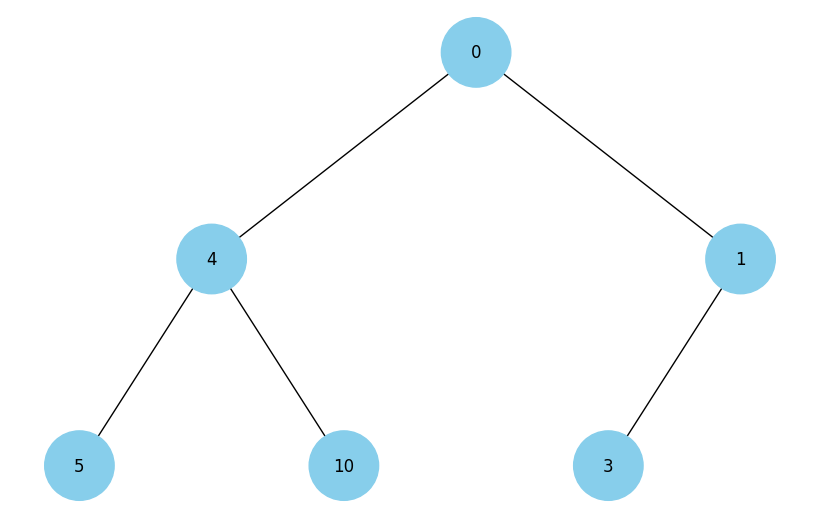

In [7]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt


class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Additional argument to store the color of the node
        self.id = str(uuid.uuid4())  # A unique identifier for each node


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(
            node.id, color=node.color, label=node.val
        )  # Using id and saving node value
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2**layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2**layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]["color"] for node in tree.nodes(data=True)]
    labels = {
        node[0]: node[1]["label"] for node in tree.nodes(data=True)
    }  # Use node values for labels

    plt.figure(figsize=(8, 5))
    nx.draw(
        tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors
    )
    plt.show()


# Creating a tree
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Tree display
draw_tree(root)

#### 4.2 - Function to build up a binary heap

Heap list: [1, 3, 2, 7, 9, 5]


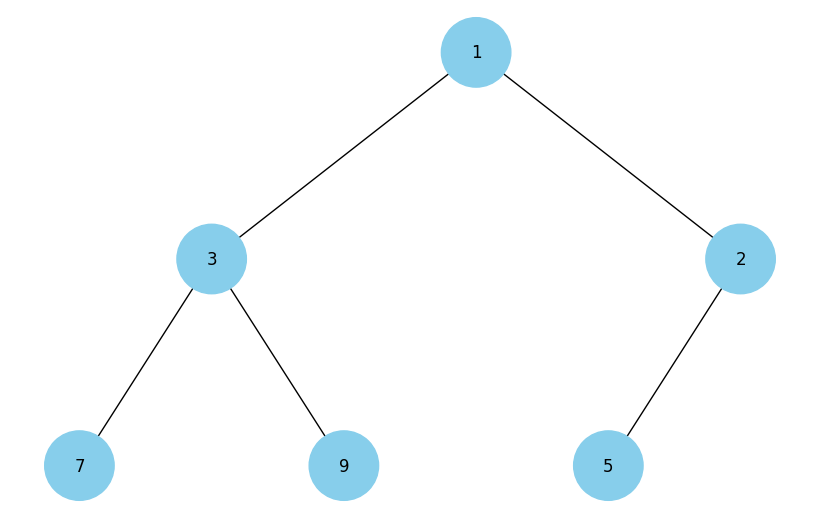

In [10]:
import heapq


def build_heap_tree(heap: list, root: None | Node = None, index: int = 0) -> Node:
    if index < len(heap):
        root = Node(heap[index])
        root.left = build_heap_tree(heap, root.left, 2 * index + 1)
        root.right = build_heap_tree(heap, root.right, 2 * index + 2)
    return root


# Binary heap in the form of a list
heap_list = [1, 3, 5, 7, 9, 2]
heapq.heapify(heap_list)
print(f"Heap list: {heap_list}")
# Building a tree from the heap
heap_tree_root = build_heap_tree(heap_list)

# Binary heap tree visualization
draw_tree(heap_tree_root)

___
### Task 5. Visualization of traversal of a binary tree

Using the code from Exercise 4 to build a binary tree, you need to create a Python program that visualizes the traversals of the tree: depthwise and breadthwise.

It should display each step in nodes with different colors using the 16-system RGB (example #1296F0). The colors of the nodes should change from dark to light shades, depending on the traversal sequence. Each node when visited should receive a unique color that visually reflects the order of traversal.

DFS traversal order: [0, 4, 5, 10, 1, 3]


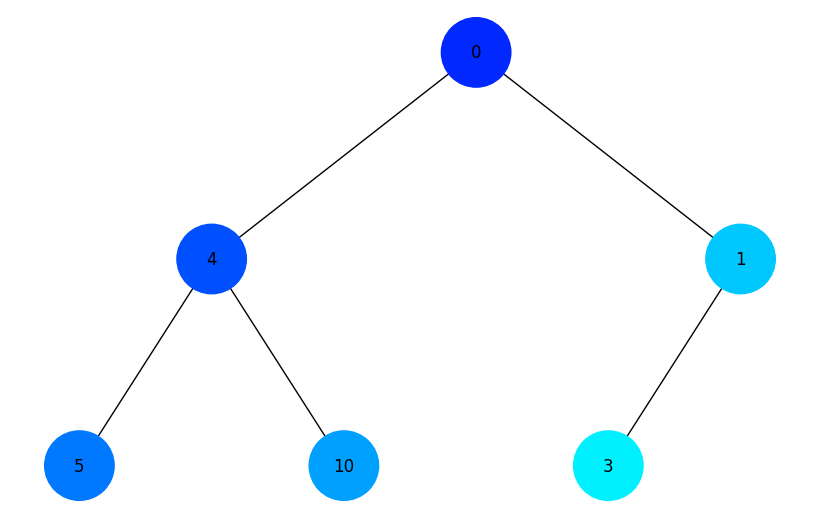

BFS traversal order: [0, 4, 1, 5, 10, 3]


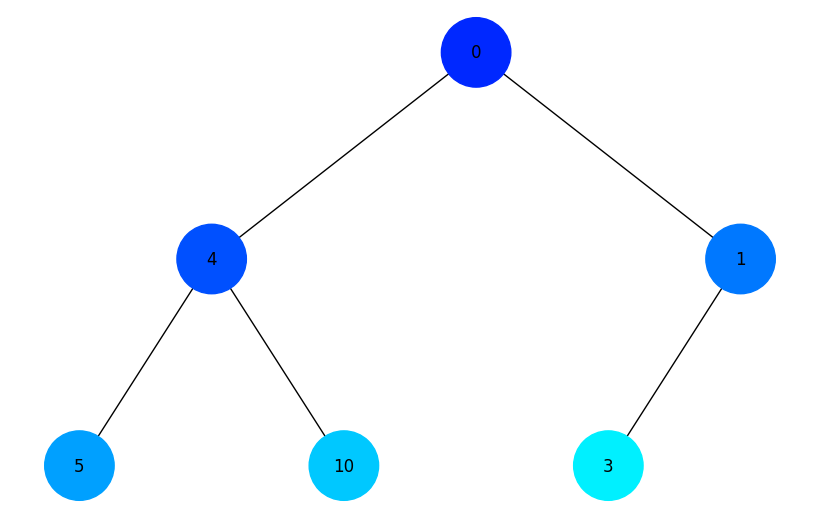

In [5]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt


class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
        self.id = str(uuid.uuid4())


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2**layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2**layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root, colors):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    node_colors = [colors[node_id] for node_id in tree.nodes()]
    labels = {node[0]: node[1]["label"] for node in tree.nodes(data=True)}

    plt.figure(figsize=(8, 5))
    nx.draw(
        tree,
        pos=pos,
        labels=labels,
        arrows=False,
        node_size=2500,
        node_color=node_colors,
    )
    plt.show()


def depth_first_traversal(node, traversal_order, colors, depth=1):
    if node:
        traversal_order.append(node.val)
        node_color = get_color(len(traversal_order))
        colors[node.id] = node_color
        depth_first_traversal(node.left, traversal_order, colors, depth + 1)
        depth_first_traversal(node.right, traversal_order, colors, depth + 1)


def breadth_first_traversal(root, traversal_order, colors):
    if root is None:
        return
    queue = [root]
    while queue:
        node = queue.pop(0)
        traversal_order.append(node.val)
        node_color = get_color(len(traversal_order))
        colors[node.id] = node_color
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)


def get_color(step):
    color_value = step * 40
    color_value = min(color_value, 255)
    hex_color = f"#{0:02X}{color_value:02X}{255:02X}"
    return hex_color


# Testing
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Depth-first traversal visualization
depth_first_order = []
depth_first_colors = {}
depth_first_traversal(root, depth_first_order, depth_first_colors)
print("DFS traversal order:", depth_first_order)
draw_tree(root, depth_first_colors)

# Reset colors for breadth-first traversal
breadth_first_colors = {node_id: "#1296F0" for node_id in depth_first_colors.keys()}

# Breadth-first traversal visualization
breadth_first_order = []
breadth_first_traversal(root, breadth_first_order, breadth_first_colors)
print("BFS traversal order:", breadth_first_order)
draw_tree(root, breadth_first_colors)

___
### Task 6: Greedy algorithms and dynamic programming

It is necessary to write a Python program that uses two approaches - a greedy algorithm and a dynamic programming algorithm to solve the problem of choosing food with the highest total calorie content within a limited budget.

Each type of food has a specified cost and calorie content. The food data is represented as a dictionary, where the key is the name of the dish and the value is a dictionary with cost and calories.

In [78]:
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}

Design the greedy_algorithm function greedy_algorithm that selects meals that maximize the calorie-to-cost ratio while staying within a given budget.

To implement the dynamic programming algorithm, create a dynamic_programming function that calculates the optimal set of dishes to maximize caloric content for a given budget.

In [88]:
def greedy_algorithm(items: dict, budget: int) -> tuple:
    sorted_items = sorted(items.items(), key=lambda x: x[1]['calories'] / x[1]['cost'], reverse=True)
    selected_items = {}
    total_cost = 0
    total_calories = 0

    for item, details in sorted_items:
        if total_cost + details['cost'] <= budget:
            selected_items[item] = details
            total_cost += details['cost']
            total_calories += details['calories']

    return selected_items, total_cost, total_calories


budget = 100
selection, cost, calories = greedy_algorithm(items, budget)
print(f"*** Greedy algorithm selection ***")
print(f"Menu: {list(selection.keys())}")
print(f"Bill: ${cost}")
print(f"Profit: {calories} cal")

*** Greedy algorithm selection ***
Menu: ['cola', 'potato', 'pepsi', 'hot-dog']
Bill: $80
Profit: 870 cal


In [91]:
def dynamic_programming(items: dict, budget: int) -> tuple:
    n = len(items)
    dp = [[0] * (budget + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        item = list(items.values())[i - 1]
        for j in range(1, budget + 1):
            if item['cost'] <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - item['cost']] + item['calories'])
            else:
                dp[i][j] = dp[i - 1][j]

    selected_items = {}
    total_calories = dp[n][budget]
    remaining_budget = budget

    for i in range(n, 0, -1):
        item = list(items.keys())[i - 1]
        if dp[i][remaining_budget] != dp[i - 1][remaining_budget]:
            selected_items[item] = items[item]
            remaining_budget -= items[item]['cost']

    return selected_items, budget - remaining_budget, total_calories


budget = 100
selection, cost, calories = dynamic_programming(items, budget)
print(f"*** Dynamic programming selection ***")
print(f"Menu: {list(selection.keys())}")
print(f"Bill: ${cost}")
print(f"Profit: {calories} cal")

*** Dynamic programming selection ***
Menu: ['potato', 'cola', 'pepsi', 'pizza']
Bill: $100
Profit: 970 cal


#### Conclusion:

The dynamic programming algorithm developed a better menu (demonstrated a more appropriate use of the budget) because it comprehensively solves the problem of maximizing calories with an available budget, while the greedy algorithm only selects from the available dishes at each step the one with the best price/calorie ratio and uses the available budget only partially.

___
### Task 7: Using the Monte Carlo method

You need to write a Python program that simulates a large number of dice rolls, calculates the sums of the numbers that come up on the dice, and determines the probability of each possible sum.

Create a simulation where two dice are rolled a large number of times. For each roll, determine the sum of the numbers that were rolled on both dice. Count how many times each possible sum (from 2 to 12) appears during the simulation. Using these data, calculate the probability of each sum.

Based on your simulations, create a table or graph that shows the probabilities of each sum found using the Monte Carlo method.

The table of probabilities of the sums when throwing two dice is as follows.

```markdown
| Amount | Probability  |
|--------|--------------|
|    2   | 2.78% (1/36) |
|    3   | 5.56% (2/36) |
|    4   | 8.33% (3/36) |
|    5   | 11.11% (4/36)|
|    6   | 13.89% (5/36)|
|    7   | 16.67% (6/36)|
|    8   | 13.89% (5/36)|
|    9   | 11.11% (4/36)|
|   10   | 8.33% (3/36) |
|   11   | 5.56% (2/36) |
|   12   | 2.78% (1/36) |
```

Compare the Monte Carlo results with the analytical calculations given in the table above.

In [3]:
import random


def roll_dice() -> int:
    return random.randint(1, 6) + random.randint(1, 6)


def calculate_probabilities(num_rolls: int) -> dict:
    counts = {i: 0 for i in range(2, 13)}

    for _ in range(num_rolls):
        roll_sum = roll_dice()
        counts[roll_sum] += 1

    probabilities = {
        amount: count / num_rolls * 100 for amount, count in counts.items()
    }
    return probabilities


def print_probabilities(probabilities: dict) -> None:
    print("|        |      Probability     |           |")
    print("| Amount | Actual | Theoretical | Deviation |")
    print("|--------|--------|-------------|-----------|")
    for amount, prob in probabilities.items():
        deviation = abs(theory_probs[amount] - prob) / theory_probs[amount] * 100
        print(
            f"| {amount:6} | {prob:5.2f}% | {theory_probs[amount]:10}% | {deviation:8.2f}% |"
        )


def main(num_rolls: int = 1000000) -> None:
    print(f"*** Dice rolls simulation: {num_rolls} rolls ***")
    probabilities = calculate_probabilities(num_rolls)
    print_probabilities(probabilities)


theory_probs = {
    2: 2.78,
    3: 5.56,
    4: 8.33,
    5: 11.11,
    6: 13.89,
    7: 16.67,
    8: 13.89,
    9: 11.11,
    10: 8.33,
    11: 5.56,
    12: 2.78,
}

main()
print()
main(10000)
print()
main(1000)

*** Dice rolls simulation: 1000000 rolls ***
|        |      Probability     |           |
| Amount | Actual | Theoretical | Deviation |
|--------|--------|-------------|-----------|
|      2 |  2.76% |       2.78% |     0.82% |
|      3 |  5.56% |       5.56% |     0.03% |
|      4 |  8.30% |       8.33% |     0.33% |
|      5 | 11.12% |      11.11% |     0.08% |
|      6 | 13.92% |      13.89% |     0.23% |
|      7 | 16.64% |      16.67% |     0.20% |
|      8 | 13.85% |      13.89% |     0.30% |
|      9 | 11.11% |      11.11% |     0.01% |
|     10 |  8.38% |       8.33% |     0.59% |
|     11 |  5.59% |       5.56% |     0.54% |
|     12 |  2.78% |       2.78% |     0.00% |

*** Dice rolls simulation: 10000 rolls ***
|        |      Probability     |           |
| Amount | Actual | Theoretical | Deviation |
|--------|--------|-------------|-----------|
|      2 |  2.77% |       2.78% |     0.36% |
|      3 |  5.85% |       5.56% |     5.22% |
|      4 |  8.31% |       8.33% |    

#### Conclusion:

The probabilities determined by the Monte Carlo method, obtained as a result of conducting 1,000,000 simulations, differ from the theoretical ones by less than 1%, which indicates the acceptable accuracy of this method with a sufficient number of simulations. When reducing the number of simulations to 10,000, the error increases to 6%, when the number of simulations is 1,000 - to 17%, which confirms the rule: to reduce the error by 10 times, you need to increase the number of trials by 100 times.